In [1]:
import os
os.environ.setdefault('KERAS_BACKEND', 'theano')

%matplotlib inline

In [2]:
cd experiments/

/home/deep/germano/trl/experiments


In [3]:
import base
from postprocess import *

Using Theano backend.


In [4]:
cd ../caronhill/data300/

/home/deep/germano/trl/caronhill/data300


## FQI Results

In [5]:
df_fqi, data_fqi = postprocess('fqi20', pat_fqi, dtype_fqi)

In [6]:
df_fqi

,n,performance,time,p_conf,t_conf
0,50,0.066068,149.573229,0.059199,4.464847


## GradPBO results

In [7]:
df = pd.DataFrame.from_csv('results-gradpbo-300.csv')

In [8]:
len(df)

336

In [9]:
df.describe()

,n,K,update_index,update_steps,batch_size,norm,performance,time,p_conf,t_conf
count,336.000000,336.0,336.000000,336.000000,336.000000,336.000000,335.000000,335.000000,335.000000,335.000000
mean,103.571429,1.0,5.241071,5.312500,97.803571,inf,-0.113875,160.795393,0.074829,6.660938
std,59.743589,0.0,3.690032,3.778252,14.097849,NaN,0.136277,268.552350,0.045504,13.868290
min,50.000000,1.0,1.000000,1.000000,1.000000,2.000000,-0.485867,4.732865,0.006145,0.057698
25%,50.000000,1.0,1.000000,1.000000,100.000000,2.000000,-0.240662,19.767611,0.028394,0.304605
50%,100.000000,1.0,5.000000,5.000000,100.000000,2.000000,-0.067311,55.535987,0.071098,1.811866
75%,150.000000,1.0,10.000000,10.000000,100.000000,inf,0.006873,162.072152,0.119226,6.539469
max,500.000000,1.0,10.000000,20.000000,100.000000,inf,0.067538,1714.518227,0.137819,134.655440


In [10]:
sorted = df.sort_values(['performance', 'time'], ascending=[False, True])

In [11]:
sorted[:10]

,n,K,incremental,update_index,update_steps,batch_size,norm,update_loss,performance,time,p_conf,t_conf
67,50,1,False,10,10,100,2.000000,b'be',0.067538,49.481511,0.023522,2.778848
2,50,1,False,5,5,100,2.000000,b'None',0.060091,6.765042,0.028917,0.110776
209,50,1,False,10,5,100,2.000000,b'auto',0.058997,43.848044,0.016411,1.121657
34,50,1,False,5,10,100,2.000000,b'be',0.057545,88.703324,0.028864,3.844051
222,50,1,False,5,5,100,2.000000,b'be',0.056142,87.698922,0.028960,3.471074
288,50,1,False,10,5,100,2.000000,b'be',0.056065,48.076829,0.019853,2.318144
180,100,1,False,1,5,100,2.000000,b'auto',0.054541,723.655598,0.020952,15.460441
91,50,1,False,10,1,100,inf,b'None',0.053972,5.129388,0.021183,0.071791
255,50,1,False,10,1,100,inf,b'auto',0.053972,21.371277,0.021183,0.587131
52,50,1,False,10,1,100,inf,b'be',0.053972,25.672952,0.021183,1.317956


In [12]:
bound = sorted[(sorted.time <= 150) & (sorted.p_conf < 0.02)]

In [13]:
bound[:20]

,n,K,incremental,update_index,update_steps,batch_size,norm,update_loss,performance,time,p_conf,t_conf
209,50,1,False,10,5,100,2.000000,b'auto',0.058997,43.848044,0.016411,1.121657
288,50,1,False,10,5,100,2.000000,b'be',0.056065,48.076829,0.019853,2.318144
120,50,1,False,10,5,100,inf,b'None',0.052805,5.816007,0.019379,0.094229
230,50,1,False,10,10,100,inf,b'None',0.052805,6.796713,0.019379,0.118309
322,50,1,False,1,5,100,inf,b'None',0.051088,13.997120,0.014559,0.199753
262,50,1,False,5,5,100,inf,b'None',0.049183,6.978598,0.012169,0.103898
325,50,1,False,5,1,100,2.000000,b'None',0.049152,5.069052,0.018478,0.057698
123,50,1,False,5,1,100,2.000000,b'auto',0.049152,32.298976,0.018478,0.694811
179,50,1,False,5,1,100,2.000000,b'be',0.049152,37.955715,0.018478,1.800348
196,50,1,False,10,5,100,inf,b'auto',0.049152,51.486237,0.019902,2.328775


In [14]:
bound2 = sorted[(sorted.time <= 150) & (sorted.p_conf < 0.01)]

In [15]:
bound2

,n,K,incremental,update_index,update_steps,batch_size,norm,update_loss,performance,time,p_conf,t_conf
205,50,1,False,1,1,100,inf,b'None',0.044091,6.794374,0.006855,0.099933
206,50,1,False,1,10,100,inf,b'None',0.043971,22.447379,0.007544,0.335564
65,50,1,False,1,5,100,2.000000,b'None',0.039941,13.798502,0.009062,0.194178


In [16]:
df[df.batch_size == 1]

,n,K,incremental,update_index,update_steps,batch_size,norm,update_loss,performance,time,p_conf,t_conf
159,50,1,False,1,1,1,2.0,b'auto',NaN,NaN,NaN,NaN
263,50,1,False,1,1,1,2.0,b'None',-0.289192,513.682392,0.111088,7.283763


In [17]:
def bar(data, field):
    x = data.value
    x = list(range(len(x)) if x.dtype == object else x)
    y = data[field]
    
    size = abs(x[0]-x[-1])
    
    plt.bar(x, y, size/50)
    plt.plot(x, y)
    plt.axhline(0, color='k')
    plt.ylabel(field)


def generate_data(df):
    D = df[(df.n != 500) & (df.batch_size != 1)]
    mean = D.mean()
    data = []
    
    for param in D.columns[:-4]:
        column = D[param]
        values = column.unique()
        values.sort()

        
        for v in values:
            pt = D[column == v][['performance', 'time']].mean()
            data.append([param, v, pt.performance - mean.performance, pt.time - mean.time])
        
    data = pd.DataFrame(data, columns=['param', 'value', 'performance', 'time'])
    return data

data = generate_data(df)

In [18]:
data

,param,value,performance,time
0,n,50,0.020636,-71.774543
1,n,100,-0.005260,-4.482056
2,n,150,-0.016522,80.244074
3,K,1,0.000000,0.000000
4,incremental,False,0.119614,57.250691
5,incremental,True,-0.124045,-59.371086
6,update_index,1,0.010656,183.724813
7,update_index,5,-0.008826,-78.836285
8,update_index,10,-0.002242,-112.664341
9,update_steps,1,0.000380,-72.961054


In [19]:
from matplotlib import pyplot as plt

In [20]:
data = data[(data.param != 'incremental') & (data.param != 'K')]

def make_barplot(data, field):
    i = j = 0
    space = 1

    fig = plt.figure()
    for param, d in data.groupby('param', sort=False):

        n = len(d.value)

        i = j + space
        j = i + n
        x = np.arange(i, j)
        y = d[field]

        plt.bar(x, y, 0.8, label='%s (%s)' %(param, ' '.join(str(v) for v in d.value)))


    fig.set_size_inches(15, 15)
    plt.legend()
    plt.tight_layout()
    plt.show()

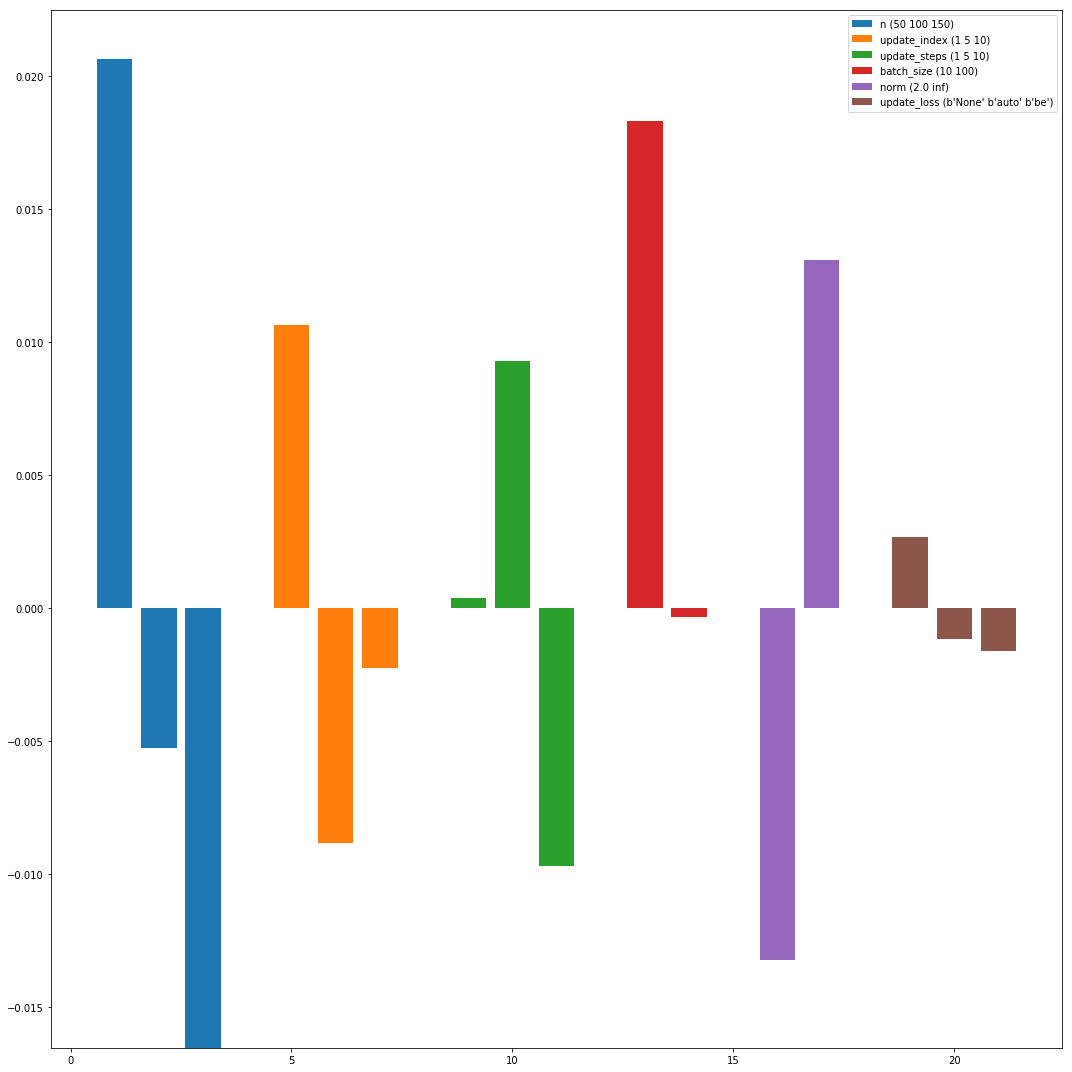

In [21]:
make_barplot(data, 'performance')

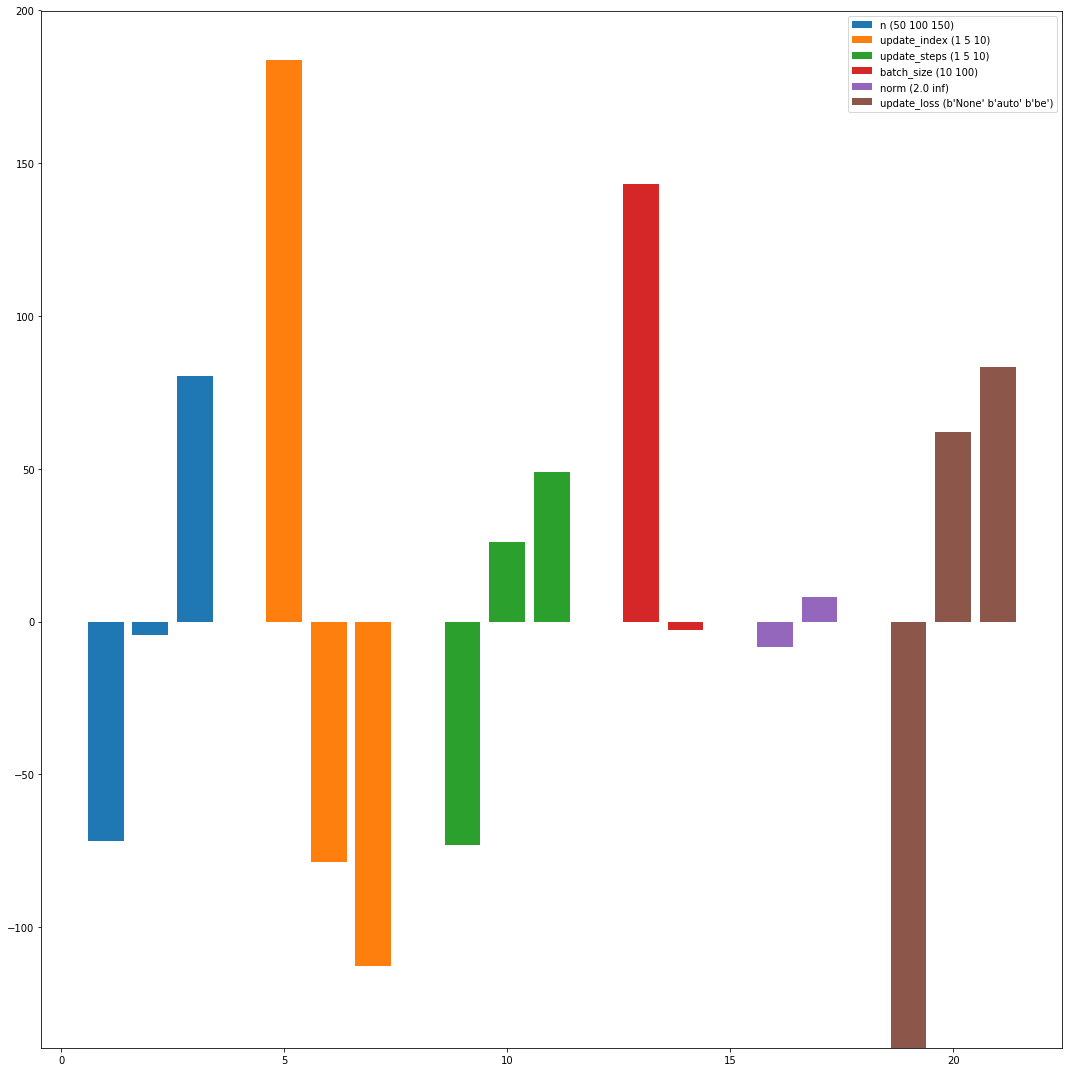

In [22]:
make_barplot(data, 'time')

## Analyzing how good is each dataset/seed

In [23]:
data = np.zeros((20, 4))

for i in range(20):
    data[i] = average_experiment_runs('gradpbo', '*/experiment-%d.h5' % i)

In [24]:
d = pd.DataFrame(data, columns=['performance', 'time', 'p_conf', 't_conf'])

In [25]:
d.sort_values(by='performance', ascending=False)

,performance,time,p_conf,t_conf
18,-0.066623,188.433603,0.021387,30.411041
0,-0.083004,197.293074,0.022402,33.370183
11,-0.085757,205.614812,0.023078,43.837588
13,-0.086773,292.655164,0.022251,109.822268
15,-0.087236,182.631152,0.023000,29.831676
6,-0.091180,193.696341,0.025635,33.863349
12,-0.093572,178.812725,0.023343,29.195421
7,-0.094171,213.522229,0.022720,45.677274
17,-0.095312,213.815270,0.024156,57.836297
1,-0.095815,215.342663,0.024814,49.336539


## Visualizing Policy of the best Q

In [29]:
def get_grid(q, n=100):
    s = int(n**0.5)
    n = s*s
    S = utils.make_grid(np.linspace(-1, 1, s), np.linspace(-3, 3, s))
    SA = np.zeros((n, 3))
    SA[:, 0:2] = S
    SA[:, 2] = -4
    a = q(SA).ravel()
    SA[:, 2] = 4
    b = q(SA).ravel()
    
    x = np.zeros(n)
    x[a>b] = -4
    x[a==b] = 0
    x[a<b] = 4
    return x.reshape(s,s).T

def show(grid, title='', subplot=111):
    ax = plt.subplot(subplot)
    plt.imshow(grid, aspect='auto', extent=[-1,1, -3,3], vmin=-4, vmax=4)
    plt.xlabel('position')
    plt.ylabel('speed')
    plt.colorbar()
    plt.title(title)
    

In [27]:
from trl import regressor

qs_grad = []
qs_fqi = []
for i in range(20):
    qg = regressor.load_regressor('gradpbo/n50K01inc0ind0ui01us01b100noinfulNone/experiment-%d.h5' % i, 'q')
    qf = regressor.load_regressor('fqi20/n50/experiment-%i.h5' % i, 'q')
    qs_grad.append(qg)
    qs_fqi.append(qf)

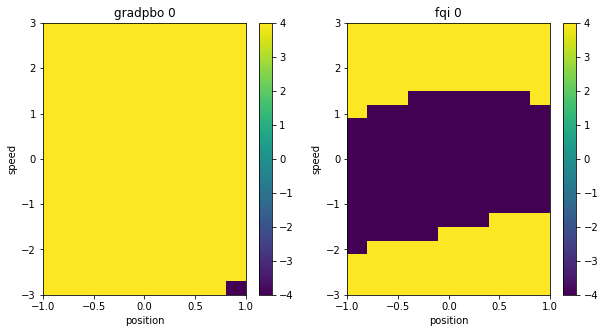

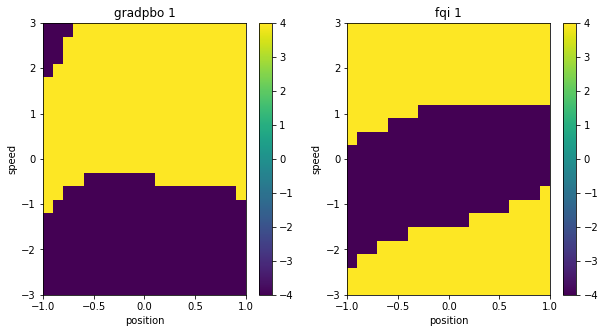

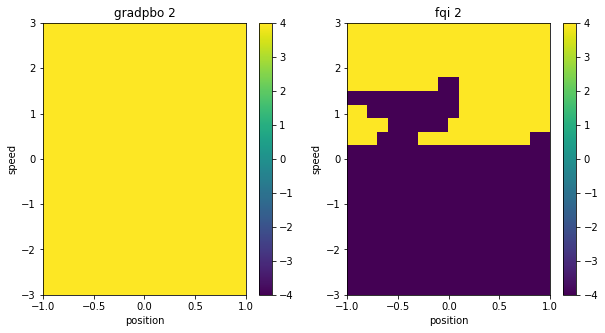

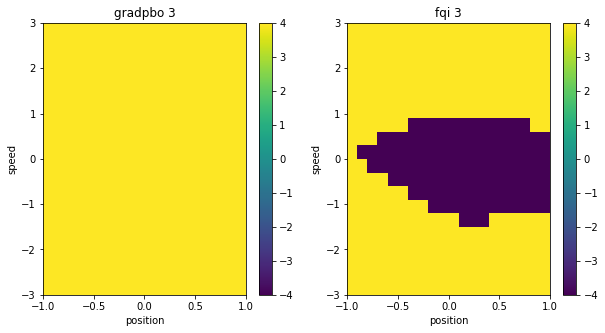

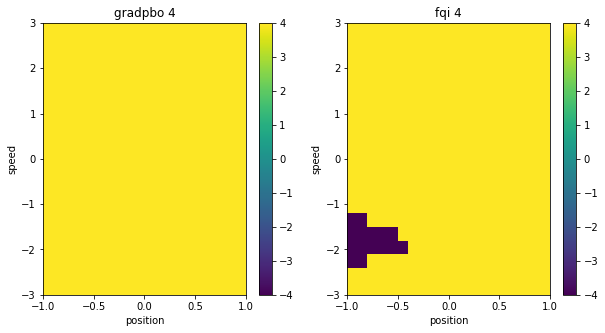

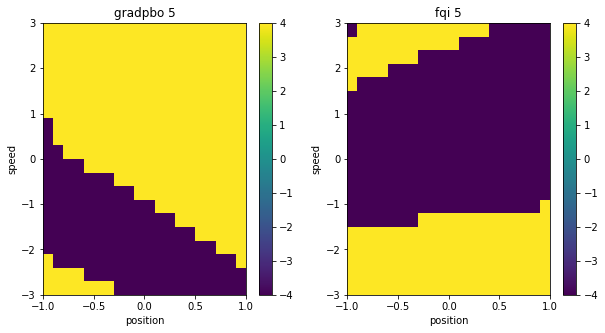

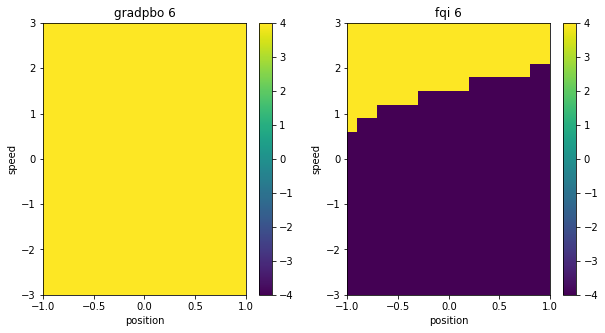

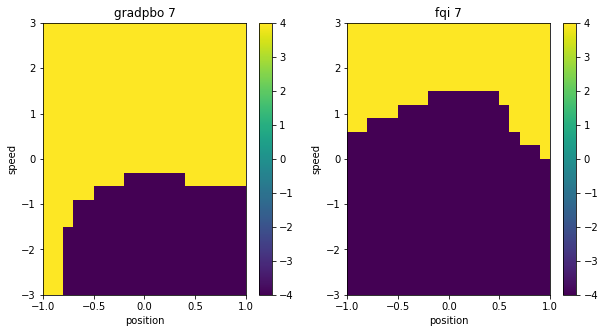

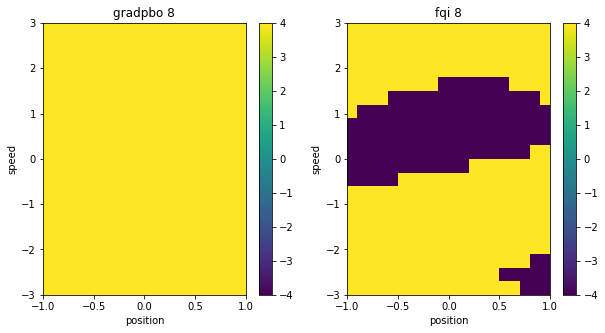

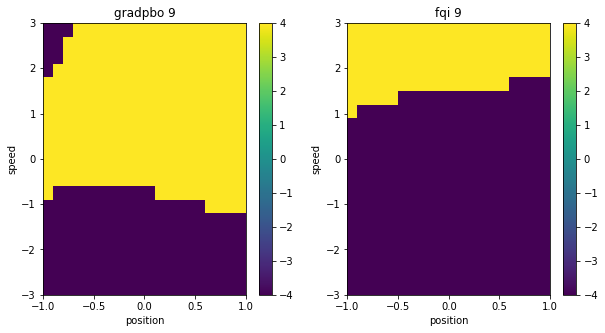

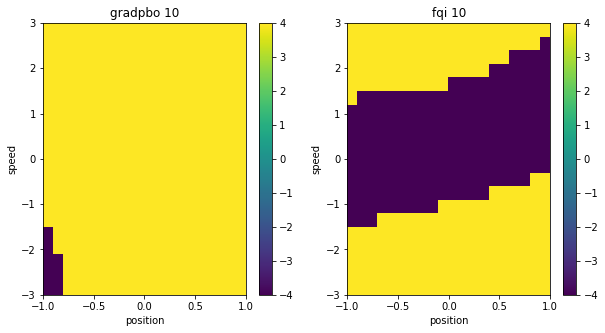

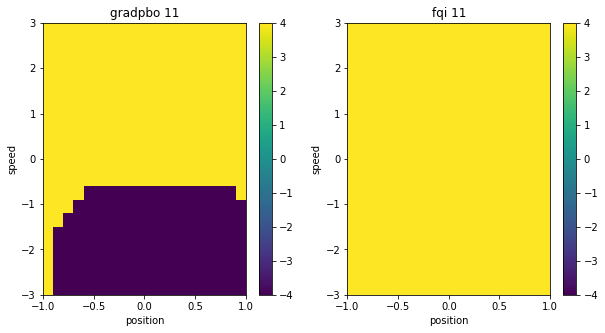

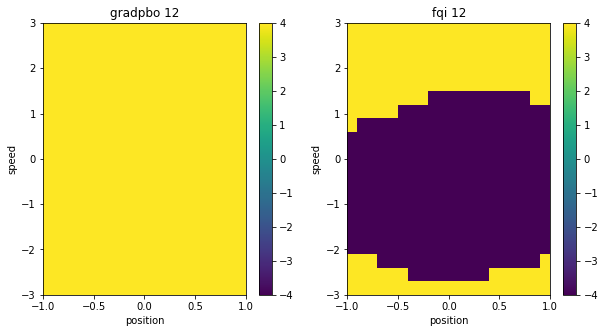

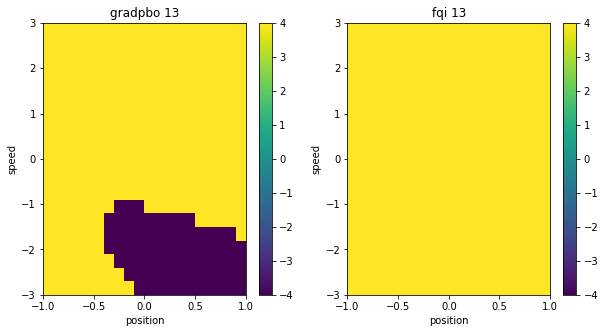

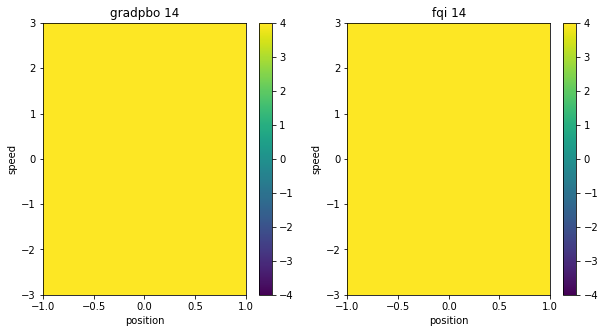

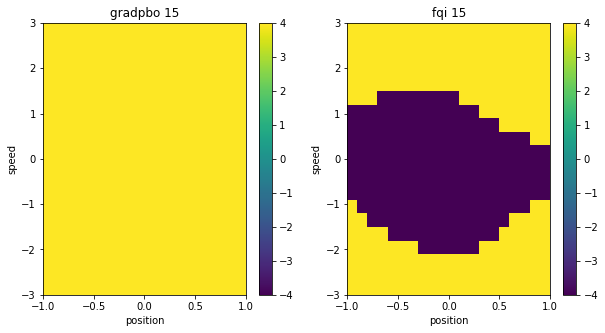

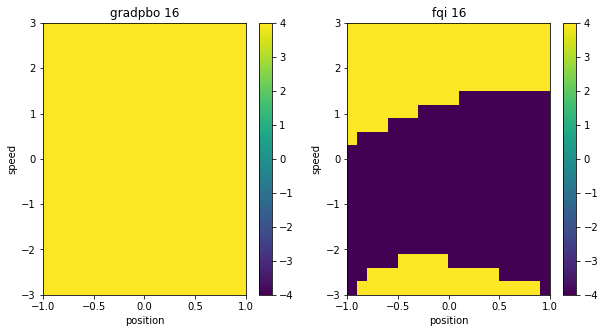

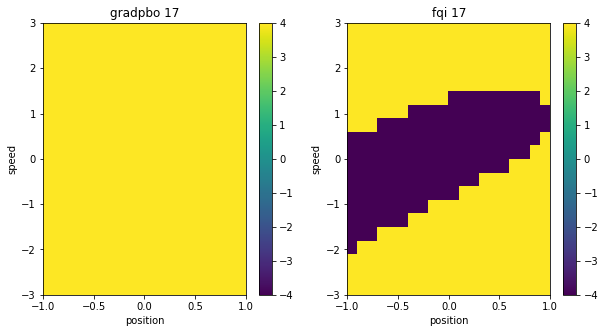

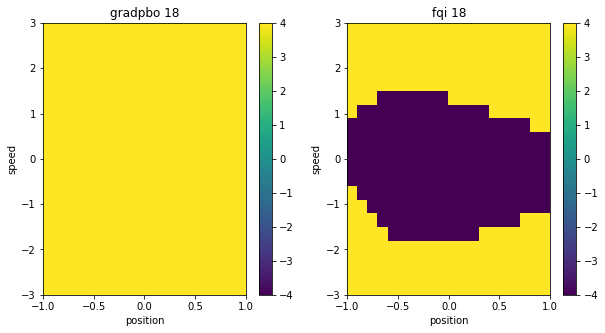

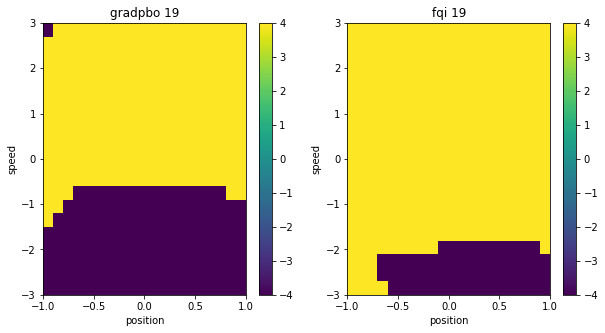

In [30]:
for i, grad, fqi in zip(range(20), qs_grad, qs_fqi):
    plt.figure(figsize=(10,5))
    show(get_grid(grad, n=400), 'gradpbo %d' % i, 121)
    show(get_grid(fqi, n=400), 'fqi %d' % i, 122)
    plt.show()